#1. Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import gzip
import json
import pandas as pd
import gzip
import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
import regex as re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import math
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from google.colab import drive

import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
from PIL import Image

nlp = spacy.load("en_core_web_sm")
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
stop_words = set(stopwords.words("english"))
punctuations = string.punctuation.replace("'", "")


from google.colab import drive

In [ ]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

def parse(path):
    try:
        with gzip.open(path, 'rt') as file:
            for line in file:
                yield json.loads(line)
    except EOFError as e:
        print(f"Error reading file: {e}")
        print(f"Please check the integrity and format of the file: {path}")

def getDF(path):
    try:
        data = [d for d in parse(path)]
        return pd.DataFrame(data)
    except Exception as e:
        print(f"Error processing file: {e}")
        print(f"Please check the integrity and format of the file: {path}")

# Example usage
df= getDF('/content/drive/MyDrive/RecSys/All_Beauty.json.gz')
df1= getDF('/content/drive/MyDrive/RecSys/meta_All_Beauty.json.gz')


In [ ]:
comp_data=df
comp_data=df.merge(df1, on="asin")

### Comment -2 - Classification of data
Classification 1 - on basis of negetive and positive sentiments by analysing the ratings < 3 as 0 (negetive) and rating > 3(positive) and dropping the products which were rated negetively.

Classification 2 - on the basis of reviewTime and dropping the products which were reviewd before 2016.

In [ ]:
df['bin_rate'] = 1
df.loc[df['overall'] <= 3, 'bin_rate'] = 0
dropped_neg = df[df['bin_rate'] == 0]
df = df[df['bin_rate'] != 0]
#
df['reviewTime'] = pd.to_datetime(df['reviewTime'], )
newdata = df[~(df['reviewTime'] < '2016-01-01')]
#
data= newdata.merge(df1, on="asin")
data1= pd.DataFrame(data, columns=["reviewerID","reviewText","summary","asin","price","description","title","brand","also_view"])
data2=pd.DataFrame(df1,columns=['description','title','brand'])

In [ ]:
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5.0,True,2016-03-10,A5TA1NJOC0PJ5,7414204790,Amazon Customer,Excellent very good,Five Stars,1457568000,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5.0,True,2018-03-02,A3RSWSUNBBH49Y,7414204790,Jenny,I have OILY skin. I have tried quite a few mat...,Balanced,1519948800,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5.0,True,2017-09-09,A1NNFQIJE08G74,7414204790,niro,I like this one then green one I don't know wh...,This thing works,1504915200,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,4.0,True,2017-04-12,A1TZ1QV2QD7QZV,7414204790,Surya,Product delivered was different flavour instea...,Four Stars,1491955200,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,5.0,True,2017-04-07,A3U25L8AA0LKZP,7414204790,Moitrayee,my favorite beauty product,my favorite beauty product,1491523200,NaN,...,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152238,5.0,True,2017-05-09,A7WHO9ZFPHU2B,B01HJ84SGM,David P. Birtwell,"I think D-Mannose, Nature's Herbs, Cranberry W...",Lifesavers...,1494288000,NaN,...,[],"207,410 in Beauty & Personal Care (","[B01KON9B4S, B000JN4CR0, B071ZHMRHS, B01HJ84TN...","{'Shipping Weight:': '1 pounds (', 'ASIN: ': '...",All Beauty,,,$55.63,[],[]
152239,5.0,True,2017-10-28,A338U2R53FLF9U,B01HJEGTYK,Gayle,love! love! love! these what a Time Saver for ...,love! love,1509148800,NaN,...,[],"478,123 in Beauty & Personal Care (","[B06XNM7CGD, B071D7TMQS]","{' Item Weight: ': '1.12 ounces', 'Sh...",All Beauty,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
152240,4.0,True,2017-07-22,A3EN87RJFCIORB,B01HJEGTYK,Cyndi P.,"Good quality, a bit small.",Shiny,1500681600,NaN,...,[],"478,123 in Beauty & Personal Care (","[B06XNM7CGD, B071D7TMQS]","{' Item Weight: ': '1.12 ounces', 'Sh...",All Beauty,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
152241,5.0,True,2017-03-16,A3FSOR5IJOFIBE,B01HJEGTYK,TYW,I was skeptical about buying this. Worried it...,Awesome,1489622400,34,...,[],"478,123 in Beauty & Personal Care (","[B06XNM7CGD, B071D7TMQS]","{' Item Weight: ': '1.12 ounces', 'Sh...",All Beauty,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


###Dropping the null values in any cells row wise.

```
# This is formatted as code
```



In [ ]:
#
data1.dropna(subset=data1.columns, inplace=True)
data1 = data1[data1.ne('').all(axis=1)]
data2.dropna(subset=data2.columns, inplace=True)
data2 = data2[data2.ne('').all(axis=1)]
data2 = data2[data2.astype(str) != '[]'].dropna()
data1 = data1[data1.astype(str) != '[]'].dropna()
data1['description']=data1['description'].apply(lambda x:''.join(x))
data2['description']=data2['description'].apply(lambda x:''.join(x))
data2['title']=data2['title'].apply(lambda x:''.join(x))

###Comment -3 - Building User profile and Item profile -
User profile consists of review+description+title+brand as a single document each for each product.

Item profile consists of description+title+brand as a single document each for each product.

In [ ]:
data1['tags'] = (
    data1['reviewText'].astype(str) +
    ' ' +
    data1['description'].astype(str)+
    ' ' +
    data1['title'].astype(str)+
    ' ' +
    data1['brand'].astype(str)
)

data2['tags2']=(
    data2['description'].astype(str)+
    ' ' +
    data2['title'].astype(str)+
    ' ' +
    data2['brand'].astype(str)
)

all_beauty= data1[['title','reviewerID','asin','tags']]
all_beauty_des=data2[['title','tags2']]

all_beauty=pd.DataFrame(all_beauty)
all_beauty_des=pd.DataFrame(all_beauty_des)

###Comment - 4 - Lemmatization, RegEx and StopWords removal

In [ ]:
all_beauty['clean_tags'] = all_beauty['tags'].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...$()-@#_]", " ", s).lower().split()))
all_beauty["clean_tags"].replace(r'\d+', '', regex=True, inplace=True)
all_beauty_des['clean_tags2'] = all_beauty_des['tags2'].apply(lambda s: ' '.join(re.sub("[.,!?:;-='...$()-@#_]", " ", s).lower().split()))
all_beauty_des["clean_tags2"].replace(r'\d+', '', regex=True, inplace=True)
#
nltk.download('stopwords')
stop = set(stopwords.words('english'))

#
def rem_en(input_txt):
    words = input_txt.lower().split()
    noise_free_words = [word for word in words if word not in stop]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text
all_beauty["clean_tags"] = all_beauty["clean_tags"].apply(lambda s: rem_en(s))
all_beauty_des["clean_tags2"] = all_beauty_des["clean_tags2"].apply(lambda s: rem_en(s))

#
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
all_beauty['clean_tags'] = all_beauty['clean_tags'].apply(lambda text: lemmatize_words(text))
all_beauty_des["clean_tags2"] = all_beauty_des["clean_tags2"].apply(lambda text: lemmatize_words(text))
#
all_beauty = all_beauty.reset_index(drop=True)
all_beauty_des = all_beauty_des.reset_index(drop=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#2.EDA

In [ ]:
reviews = pd.read_json("/content/drive/MyDrive/RecSys/All_Beauty.json.gz", lines=True)
metadata = pd.read_json("/content/drive/MyDrive/RecSys/meta_All_Beauty.json.gz", lines=True)

reviews = reviews[["asin", "reviewerID", "overall", "summary", "reviewText"]]
metadata = metadata[["asin", "title", "description", "brand"]] # , "rank", "also_buy", "also_view"
reviews.rename(columns={"reviewerID": "id", "overall": "rating", "summary": "head", "reviewText": "body"}, inplace=True)

ratings = reviews["rating"].copy()
reviews = reviews[reviews["rating"] > 3]
reviews.dropna(inplace=True)
metadata.dropna(inplace=True)

# metadata["rank"] = metadata["rank"].apply(str).apply(lambda x: (int(re.search(r"[0-9,]+", x).group(0).replace(",", ""))) if (re.fullmatch(r"[0-9,]+ in Beauty \& Personal Care \(", x) != None) else (-1))
metadata["description"] = [" ".join(map(str, li)) for li in metadata["description"]]

reviews["head"] = reviews["head"].apply(lambda x: x.translate(str.maketrans("", "", punctuations)).lower())
reviews["body"] = reviews["body"].apply(lambda x: x.translate(str.maketrans("", "", punctuations)).lower())
metadata["title"] = metadata["title"].apply(lambda x: x.translate(str.maketrans("", "", punctuations)).lower())
metadata["description"] = metadata["description"].apply(lambda x: x.translate(str.maketrans("", "", punctuations)).lower())
metadata["brand"] = metadata["brand"].apply(lambda x: x.translate(str.maketrans("", "", punctuations)).lower())

reviews["content"] = reviews["head"] + " " + reviews["body"]
metadata["content"] = metadata["title"] + " " + metadata["description"] + " " + metadata["brand"]
reviews.drop(columns=["head", "body", "rating"], inplace=True)
metadata.drop(columns=["title", "description", "brand"], inplace=True)

reviews.drop_duplicates(inplace=True)
metadata.drop_duplicates(inplace=True)

reviews = reviews.merge(metadata, on="asin", how="inner", suffixes=("_", ""))

In [ ]:
doc = nlp(reviews["content"].values[4].replace("\\", ""))
for sent in doc.sents:
  print(">", sent.start, sent.end, ">", sent)
for sent in doc.sents:
  for tok in sent:
    print(tok, "|", tok.lemma_, "|", spacy.explain(tok.pos_), "|", tok.is_stop)
  break
for sent in doc.sents:
  for tok in sent:
    print(tok, "|", tok.morph)
  break
for ent in doc.ents:
  print(ent, "|", ent.label_)

> 0 27 > lacto calamine skin balance oil control 120 ml pack of 2 lacto calamine skin balance daily nourishing lotion  oil control 120ml pack of 2 pirmal healthcare
lacto | lacto | proper noun | False
calamine | calamine | proper noun | False
skin | skin | proper noun | False
balance | balance | noun | False
oil | oil | noun | False
control | control | noun | False
120 | 120 | numeral | False
ml | ml | noun | False
pack | pack | noun | False
of | of | adposition | True
2 | 2 | numeral | False
lacto | lacto | noun | False
calamine | calamine | proper noun | False
skin | skin | proper noun | False
balance | balance | proper noun | False
daily | daily | adjective | False
nourishing | nourishing | noun | False
lotion | lotion | noun | False
  |   | space | False
oil | oil | noun | False
control | control | noun | False
120ml | 120ml | adjective | False
pack | pack | noun | False
of | of | adposition | True
2 | 2 | numeral | False
pirmal | pirmal | noun | False
healthcare | healthcare | nou

In [ ]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269777 entries, 0 to 269776
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   asin      269777 non-null  object
 1   id        269777 non-null  object
 2   content_  269777 non-null  object
 3   content   269777 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB
None


In [ ]:
print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32488 entries, 0 to 32891
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   asin     32488 non-null  object
 1   content  32488 non-null  object
dtypes: object(2)
memory usage: 761.4+ KB
None


In [ ]:
def get_stemmed(text):
  words = [PorterStemmer().stem(word) for word in word_tokenize(text) if word not in stop_words]
  return " ".join(words)

def get_word_clouds(df, column):
  all = " ".join(df[column])
  plt.figure()
  word_cloud = WordCloud(background_color="white").generate(all)
  plt.imshow(word_cloud, interpolation="bilinear")
  plt.axis("off")
  plt.figure()
  word_cloud = WordCloud(background_color="white", mask=np.array(Image.open("./assets/amazon-logo.png")), max_font_size=32).generate(all)
  plt.imshow(word_cloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

def get_most_common_words(df, column):
  temp = df[column].apply(get_stemmed)
  top_words = Counter([word for text in temp for word in text.split()]).most_common(25)
  plt.bar(*zip(*top_words))
  plt.xticks(rotation=-90)
  plt.show()

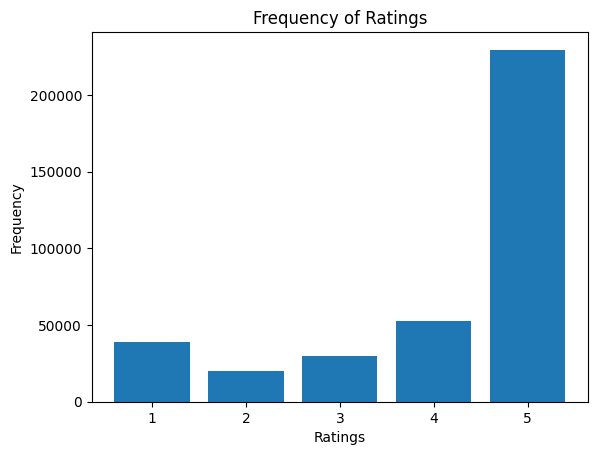

In [ ]:
ratings_freq = ratings.value_counts().sort_index()
plt.bar(ratings_freq.index, ratings_freq.values)
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Frequency of Ratings")
plt.show()

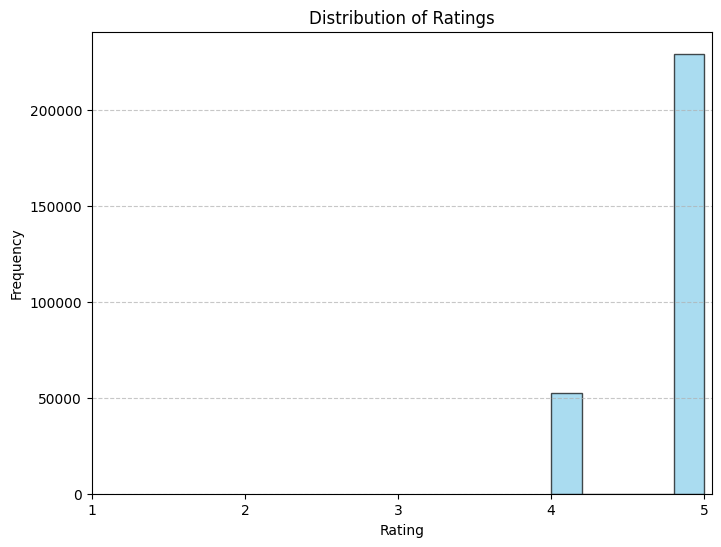

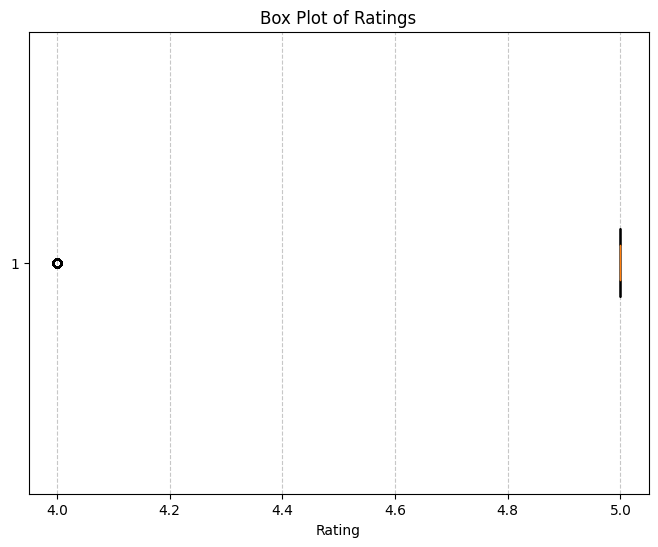

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.hist(df['overall'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(range(1, 6))  # Set x-axis ticks to show all possible ratings (1 to 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize distribution of ratings using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['overall'], vert=False, patch_artist=True, notch=True, boxprops=dict(facecolor='lightgreen'))
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#majority of ratings are concentrated at the highest level (5), with relatively few ratings at lower levels.
#The distribution is right-skewed, indicating a positive bias towards higher ratings.
#Outliers are present on the lower end of the scale, but they are relatively few in number compared to the bulk of the ratings.

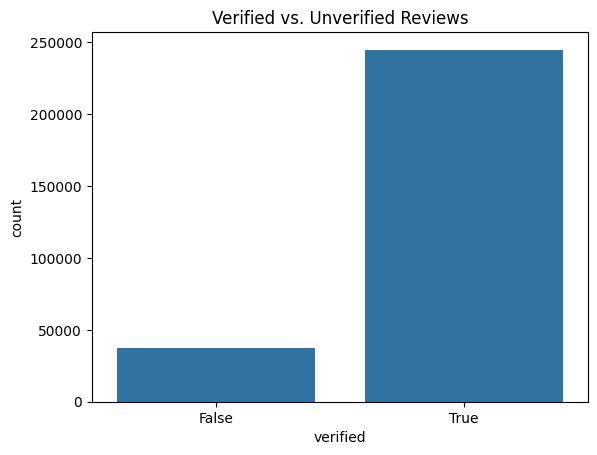

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='verified', data=df)
plt.title('Verified vs. Unverified Reviews')
plt.show()


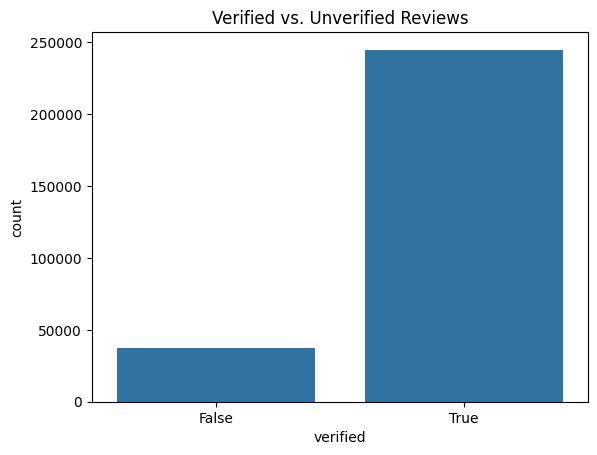

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='verified', data=df)
plt.title('Verified vs. Unverified Reviews')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Sample DataFrame 'df' with 'reviewText' column containing review data
# Assuming 'df' is your actual DataFrame
# You can skip this step if you already have the DataFrame 'df'
# df = pd.DataFrame({'reviewText': ['This is a great product', 'The product was disappointing', 'Good quality item']})

# Tokenize the text in the 'reviewText' column
df['vote'] = df['reviewText'].apply(lambda x: len(word_tokenize(x)))

# Visualize the distribution of review lengths using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['vote'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#3. Text Representation using TF-IDF

###Reccomendation on the basis of n_gram=(1,3) features


In [ ]:
count = CountVectorizer()
tfidf_vec = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,3),max_features=45000)
count_matrix1 = tfidf_vec.fit_transform(all_beauty['clean_tags'])
count_matrix2 = tfidf_vec.fit_transform(all_beauty_des['clean_tags2'])

#4. Dimensionality Reduction Using SVD

In [ ]:
truncatedSVD1=TruncatedSVD(1500)
svd_matrix1 = truncatedSVD1.fit_transform(count_matrix1)
explained_variance_ratio1 = truncatedSVD1.explained_variance_ratio_
cumulative_explained_variance1 = np.cumsum(explained_variance_ratio1)
print(cumulative_explained_variance1)

[0.04037434 0.07093908 0.10336026 ... 0.93387517 0.9339204  0.93396561]


In [ ]:
truncatedSVD2=TruncatedSVD(1500)
svd_matrix2 = truncatedSVD2.fit_transform(count_matrix2)
explained_variance_ratio2 = truncatedSVD2.explained_variance_ratio_
cumulative_explained_variance2 = np.cumsum(explained_variance_ratio2)
print(cumulative_explained_variance2)

[0.01273135 0.01718836 0.02152865 ... 0.5688473  0.56898813 0.56912878]


In [ ]:
print(np.argmax(cumulative_explained_variance1 >= 0.90) +1)
print(np.argmax(cumulative_explained_variance2 >= 0.50) +1)


1015
1097


#5. Calculating Similarity using Cosaine Similarity

In [ ]:
svd_batch_1=svd_matrix1[:15000]
cosine_sim1 = cosine_similarity(svd_batch_1, svd_batch_1)#User reviewd products with user reviewd products
cosine_sim2 = cosine_similarity(svd_batch_1, svd_matrix2)#User reviewd products with all the beauty category product
cosine_sim3 = cosine_similarity(svd_matrix2, svd_matrix2)#All beauty category products with beauty category producst

In [ ]:
similarity_df1 = pd.DataFrame(cosine_sim1,index= all_beauty['clean_tags'][:15000].index, columns=all_beauty['clean_tags'][:15000].index) #user-user similarity
similarity_df2 = pd.DataFrame(cosine_sim2,index= all_beauty['clean_tags'][:15000].index, columns=all_beauty_des['clean_tags2'].index) #user-all products similarity
similarity_df3 = pd.DataFrame(cosine_sim3,index= all_beauty_des['clean_tags2'].index, columns=all_beauty_des['clean_tags2'].index) #all products - all products similarity
mapping1 = pd.Series(all_beauty[:15000].index,index = all_beauty['title'][:15000])
mapping2 = pd.Series(all_beauty_des.index,index = all_beauty_des['title'])


#6. Reccomendation top_k=25

In [ ]:
all_beauty_des['title'][9076]

'Olivia Care Natural Moisturizing Olive Oil Bath Soap - French Mandarin 4 pk'

In [ ]:
def get_similar_products(all_beauty0, all_beauty_des, similarity_df, mapping, product_index, top_n=25):
    prod = all_beauty0['title'][product_index]
    prod_index = mapping[prod]

    similarity_score = list(enumerate(similarity_df.iloc[prod_index]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    similarity_score = similarity_score[1:top_n + 1]

    prod_indices = [i[0] for i in similarity_score]

    similar_titles = all_beauty_des['title'].iloc[prod_indices].tolist()
    similar_indices = [comp_data[comp_data['title'] == title].index[0] for title in similar_titles]
    ratings = [comp_data['overall'][index] for index in similar_indices]

    return similar_titles, ratings, similar_indices


product_index = 9076
titles0, ratings0, indices0 = get_similar_products(all_beauty, all_beauty_des, similarity_df2, mapping1, product_index)
titles, ratings, indices = get_similar_products(all_beauty_des, all_beauty_des, similarity_df3, mapping2, product_index)


In [ ]:
d1=np.array([titles0, ratings0, indices0]).T
d2=np.array([titles, ratings, indices]).T
User_Product_Reccomended_items=pd.DataFrame(d1,columns=['Title','Rating','Index'])
Product_product_Reccomended_items = pd.DataFrame(d2,columns=['Title','Rating','Index'])

In [ ]:
User_Product_Reccomended_items

,Title,Rating,Index
0,Benefit Cosmetics All Purpose Makeup Pencil Sh...,5.0,382523
1,YSL YVES SAINT LAURENT Mon Paris 1.2ml/0.04oz ...,5.0,311933
2,Gentlemen's Hardware Apothecary Brick Soap,4.0,382514
3,Gentlemen's Hardware Apothecary Shaving Cream,5.0,382513
4,Australian Gold 8 oz. Lotion with Kona Bronzer...,5.0,382511
5,Degree Women MotionSense Antiperspirant Deodor...,1.0,382510
6,BIAL 24K Golden Beauty Bar Facial Massager Wat...,1.0,382505
7,colgate slim soft charcoal toothbrush (pack of...,5.0,311893
8,Yosoo Professional Hair Salon Nylon Barber Cap...,5.0,311877
9,5 Pairs Pack Disposable Petal Shape Invisible ...,5.0,382498


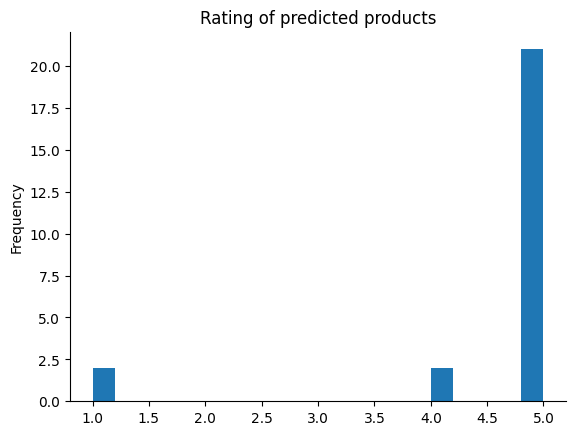

In [ ]:
from matplotlib import pyplot as plt
Product_product_Reccomended_items['Rating'].plot(kind='hist', bins=20, title='Rating of predicted products')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Product_product_Reccomended_items

,Title,Rating,Index
0,"Olivia Care Liquid Hand Soap Mandarin, 18.5oz",5.0,317157
1,"Olivia Care Liquid Hand Soap, Verbena, 18.5-Ou...",5.0,317162
2,"Olivia Care Liquid Hand Soap , Lavender, 18.5-...",5.0,317150
3,Olivia Care French Natural Olive Oil Bar Soap ...,5.0,359461
4,Natural Olive Nablus Natural Olive Oil Soap 10...,5.0,332613
5,Bariani Olive Oil Body Soap &amp; Shampoo -(12oz),5.0,330131
6,Bar Soap 100% Virgin Olive Oil Face &amp; Body...,1.0,33569
7,Proclaim Natural 7 Olive Oil,5.0,125701
8,Blood Orange Olive Oil Bar Soap by 80 Acres,5.0,321637
9,"Olivina Bath Soap, Classic Olive, 8 Ounce",5.0,321970


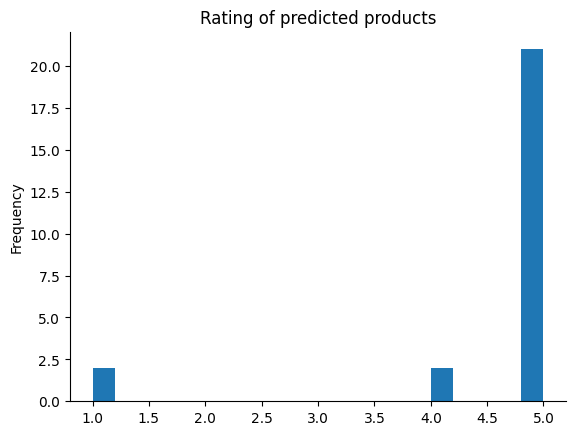

In [ ]:

from matplotlib import pyplot as plt
Product_product_Reccomended_items['Rating'].plot(kind='hist', bins=20, title='Rating of predicted products')
plt.gca().spines[['top', 'right',]].set_visible(False)

#7. Evaluation

###We have taken a very naive approach to evaluation by using the formula - where,
*number of successfull reccomendations* = no of the reccomended product's rating that are greater than 3 (either 4 or 5) i.e positive product recommendations.   
*Total no of reccomendations* = top k products reccomended


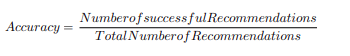

In [ ]:

def calculate_success_rate(recommendations_df):
    recommendations_df['Rating'] = pd.to_numeric(recommendations_df['Rating'], errors='coerce')
    # Droping rows with NaN values in the 'Rating' column
    recommendations_df.dropna(subset=['Rating'], inplace=True)
    # recommended products with ratings greater than 3
    successful_recommendations = recommendations_df[recommendations_df['Rating'] > 3]
    #number of successful recommendations
    num_successful_recommendations = successful_recommendations.shape[0]
    #total number of recommendations made
    total_recommendations = recommendations_df.shape[0]
    #success rate
    success_rate = num_successful_recommendations / total_recommendations
    return success_rate
success_rate = calculate_success_rate(Product_product_Reccomended_items)
success_rate2 = calculate_success_rate(User_Product_Reccomended_items)
print("Success rate of recommendations for user_reviewd_products and all_beauty_product comparision:", success_rate)
print("Success rate of recommendations for all_beauty_product and all_beauty_product comparision:", success_rate2)

Success rate of recommendations for user_reviewd_products and all_beauty_product comparision: 0.92
Success rate of recommendations for all_beauty_product and all_beauty_product comparision: 0.8


#8. Observations

###Reccomendation on the basis of n_gram=(2,2) features
We observed that the 1500 features could explain only 80% of the data in case of user profile vector and could explain only 60% of the all beauty products data. When we took n_gram=(2,2) (bigram) our 1500 features could explain only 50% of the all beauty products data, therfore the same features could explain more data when taken n_gram=(1,3)

#Extra_code(Not relavant to results)

In [ ]:
# count = CountVectorizer()
# tfidf_vec = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(2,2),max_features=45000)
# count_matrix1 = tfidf_vec.fit_transform(all_beauty['clean_tags'])
# count_matrix2 = tfidf_vec.fit_transform(all_beauty_des['clean_tags2'])

In [ ]:
# truncatedSVD1=TruncatedSVD(1500)
# svd_matrix1 = truncatedSVD1.fit_transform(count_matrix1)
# explained_variance_ratio1 = truncatedSVD1.explained_variance_ratio_
# cumulative_explained_variance1 = np.cumsum(explained_variance_ratio1)
# print(cumulative_explained_variance1)

In [ ]:
# truncatedSVD2=TruncatedSVD(1500)
# svd_matrix2 = truncatedSVD2.fit_transform(count_matrix2)
# explained_variance_ratio2 = truncatedSVD2.explained_variance_ratio_
# cumulative_explained_variance2 = np.cumsum(explained_variance_ratio2)
# print(cumulative_explained_variance2)

In [ ]:
# print(np.argmax(cumulative_explained_variance1 >= 0.90) +1)
# print(np.argmax(cumulative_explained_variance2 >= 0.60) +1)


In [ ]:
# svd_batch_1=svd_matrix1[:15000]
# cosine_sim1 = cosine_similarity(svd_batch_1, svd_batch_1)
# cosine_sim2 = cosine_similarity(svd_batch_1, svd_matrix2)
# cosine_sim3 = cosine_similarity(svd_matrix2, svd_matrix2)

In [ ]:
# all_beauty_des.shape

In [ ]:
# similarity_df1 = pd.DataFrame(cosine_sim1,index= all_beauty['clean_tags'][:15000].index, columns=all_beauty['clean_tags'][:15000].index)
# similarity_df2 = pd.DataFrame(cosine_sim2,index= all_beauty['clean_tags'][:15000].index, columns=all_beauty_des['clean_tags2'].index)
# similarity_df3 = pd.DataFrame(cosine_sim3,index= all_beauty_des['clean_tags2'].index, columns=all_beauty_des['clean_tags2'].index)
# mapping1 = pd.Series(all_beauty[:15000].index,index = all_beauty['title'][:15000])
# mapping2 = pd.Series(all_beauty_des.index,index = all_beauty_des['title'])
